## Additional 2D lattice sim code

<hr>

The update functions are defined for a single sender and receiver, so I will define a wrapper function that uses these same update functions for a lattice. Here, the variable `S0` will now represent the sum of neighbor expression. `S` and `n` will be Numpy arrays of the expression and number of neighbors for each cell.

Then, I will define a function to initialize the expression matrix (here just a vector, since there's one gene in our circuit) and the DataFrame to store the data. I then define a function to run the lattice simulation for a given update function.

<hr>

In [178]:
# Run sim for alpha = n
df_simple_2 = lattice_signaling_sim(n_cells, A, steps, dt, params=params, update_fun=update_S_simple)

df_simple_2 = df_simple_2.reset_index(drop=True)
df_simple_2['X_coord'] = [X[int(ix), 0] for ix in df_simple_2['cell'].values]
df_simple_2['Y_coord'] = [X[int(ix), 1] for ix in df_simple_2['cell'].values]

# Get cells nearest positive x-axis
senders = get_center_cells(X, n_center=n_senders)

# Finds all cells within 3-sigma distance from the x-axis and with x-coordinate greater than sender
x_axis_cells = np.argwhere(np.logical_and(np.abs(X[:, 1]) < sigma * 3, X[:, 0] >= np.min(X[senders, 0]))).flatten()
x_axis_which_cells = np.isin(df_simple_2['cell'].values, x_axis_cells)
x_axis_df = df_simple_2.loc[x_axis_which_cells, :].copy().sort_values(by=['X_coord', 'time']).reset_index(drop=True)


:Curve   [X_coord]   (Signal expression)
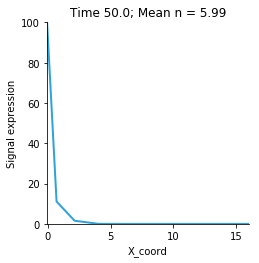

In [179]:
hv.Curve(
    data=x_axis_df.loc[x_axis_df['step'] == steps - 1, :],
    kdims=['X_coord'],
    vdims=['Signal expression'],
).opts(
    title="Time {0}; Mean n = {1:.2f}".format((steps - 1) * dt, meta_df['# neighbors'].mean()),
)

In [ ]:
# Parameter ranges
alphas = np.linspace(1, 2, 5)

# Run simulations
ls_simple = []
for alpha_ in alphas:
    params_ = alpha_, theta, beta, Kpf, ppf, gamma
    df_simple = lattice_signaling_sim(n_cells, A, steps, dt, params=params_, update_fun=update_S_simple)
    df_simple['alpha'] = alpha_
    ls_simple.append(df_simple)

In [30]:
# Parameter ranges
thetas = np.linspace(0, 20, 10)
Kpfs = np.linspace(1, 20, 10)

# Run simulations
# Simple regime
df_simple = lattice_signaling_sim(n_cells, A, steps, dt, params=params, update_fun=update_S_simple)

ls_thresh = []
ls_PF = []
ls_PFT = []

for theta_ in thetas:
    
    # Threshold regime
    params_ = alpha, theta_, beta, Kpf, ppf, gamma
    df_thresh = lattice_signaling_sim(n_cells, A, steps, dt, params=params_, update_fun=update_S_thresh)
    df_thresh['theta'] = theta_
    ls_thresh.append(df_thresh)
    
    for Kpf_ in Kpfs:
        
        # Positive feedback regime
        if theta_ == thetas[0]:
            params_ = alpha, theta, beta, Kpf_, ppf, gamma
            df_PF = lattice_signaling_sim(n_cells, A, steps, dt, params=params_, update_fun=update_S_PF)
            df_PF['Kpf'] = Kpf_
            ls_PF.append(df_PF)
        
        # PF + T regime
        params_ = alpha, theta_, beta, Kpf_, ppf, gamma
        df_PFT = lattice_signaling_sim(n_cells, A, steps, dt, params=params_, update_fun=update_S_PFT)
        df_PFT['theta'] = theta_
        df_PFT['Kpf'] = Kpf_
        ls_PFT.append(df_PFT)

In [32]:
# Touch up DataFrames
# Simple induction
df_simple = df_simple.reset_index(drop=True)
df_simple['X_coord'] = [X[int(ix), 0] for ix in df_simple['cell'].values]
df_simple['Y_coord'] = [X[int(ix), 1] for ix in df_simple['cell'].values]

# Threshold
df_thresh = pd.concat(ls_thresh).reset_index(drop=True)
df_thresh['X_coord'] = [X[int(ix), 0] for ix in df_thresh['cell'].values]
df_thresh['Y_coord'] = [X[int(ix), 1] for ix in df_thresh['cell'].values]

# Positive feedback
df_PF = pd.concat(ls_PF).reset_index(drop=True)
df_PF['X_coord'] = [X[int(ix), 0] for ix in df_PF['cell'].values]
df_PF['Y_coord'] = [X[int(ix), 1] for ix in df_PF['cell'].values]

# PF + T
df_PFT = pd.concat(ls_PFT).reset_index(drop=True)
df_PFT['X_coord'] = [X[int(ix), 0] for ix in df_PFT['cell'].values]
df_PFT['Y_coord'] = [X[int(ix), 1] for ix in df_PFT['cell'].values]

<!-- # Get cells near x-axis
x_axis_cells = np.argwhere(np.logical_and(X[:, 1] == 0, X[:, 0] >= 0)).flatten()
x_axis_which_cells = np.isin(df['cell'].values, x_axis_cells) -->

<!-- # Plot N and L in each cell and overlay
plots = []

for cell in x_axis_cells:
    plt = hv.Curve(
        data=df.loc[df['cell'] == cell, :],
        kdims=['time'],
        vdims=['Ligand expression'],
    ).opts(
        color=cc.palette.glasbey_category10[0],
        aspect=4,
        ylabel='Expression',
        title = "X = {0:.0f}".format(X[cell, 0]),
    )
    q = hv.Curve(
        data=df.loc[df['cell'] == cell, :],
        kdims=['time'],
        vdims=['Receptor expression'],
    ).opts(
        color=cc.palette.glasbey_category10[1],
        aspect=4,
        ylabel='Expression',
    )

    plots.append(plt * q)

hv.output(hv.Layout(plots).opts(tight=True, sublabel_format='').cols(3), dpi=72, ) -->

In [33]:
df_simple.to_csv('data_linear_sig/lattice_thetas_Kpfs/simple_all_cells.csv')

In [34]:
df_thresh.to_csv('data_linear_sig/lattice_thetas_Kpfs/thresh_all_cells.csv')

In [35]:
df_PF.to_csv('data_linear_sig/lattice_thetas_Kpfs/PF_all_cells.csv')

In [36]:
df_PFT.to_csv('data_linear_sig/lattice_thetas_Kpfs/PFT_all_cells.csv')

In [40]:
# Get cells nearest positive x-axis
senders = get_center_cells(X, n_center=n_senders)

# Finds all cells within 3-sigma distance from the x-axis and with x-coordinate greater than sender
x_axis_cells = np.argwhere(np.logical_and(np.abs(X[:, 1]) < sigma * 3, X[:, 0] >= np.min(X[senders, 0]))).flatten()

In [40]:
# Get DataFrame subset for x-axis cells and save
for i in np.arange(4):
    df_ = (df_simple, df_thresh, df_PF, df_PFT)[i]
    df_str = ('df_simple', 'df_thresh', 'df_PF', 'df_PFT')[i]
    x_axis_which_cells = np.isin(df_['cell'].values, x_axis_cells)
    x_axis_df = df_.loc[x_axis_which_cells, :].copy().sort_values(by=['X_coord', 'time']).reset_index(drop=True)
    x_axis_df.to_csv(f'data_linear_sig/lattice_thetas_Kpfs/' + df_str + '_x_axis_cells.csv')

Given a df with x-axis time-courses for various values of 2 parameters, get the last time-point and plot a grid of expression vs x-axis expression for values of each parameter

In [345]:
x_axis_last_time_df = x_axis_df.loc[x_axis_df['step'] == steps - 1, :].copy().reset_index(drop=True)
x_axis_last_time_df.head()

,cell,Signal expression,step,time,theta,Kpf,X_coord,Y_coord
0,544,100.0,200,50.0,0.0,1.000000,-0.01479,0.143442
1,544,100.0,200,50.0,0.0,3.111111,-0.01479,0.143442
2,544,100.0,200,50.0,0.0,5.222222,-0.01479,0.143442
3,544,100.0,200,50.0,0.0,7.333333,-0.01479,0.143442
4,544,100.0,200,50.0,0.0,9.444444,-0.01479,0.143442


:NdLayout   [Kpf]
   :NdOverlay   [theta]
      :Curve   [X_coord]   (Signal expression,theta,Kpf)
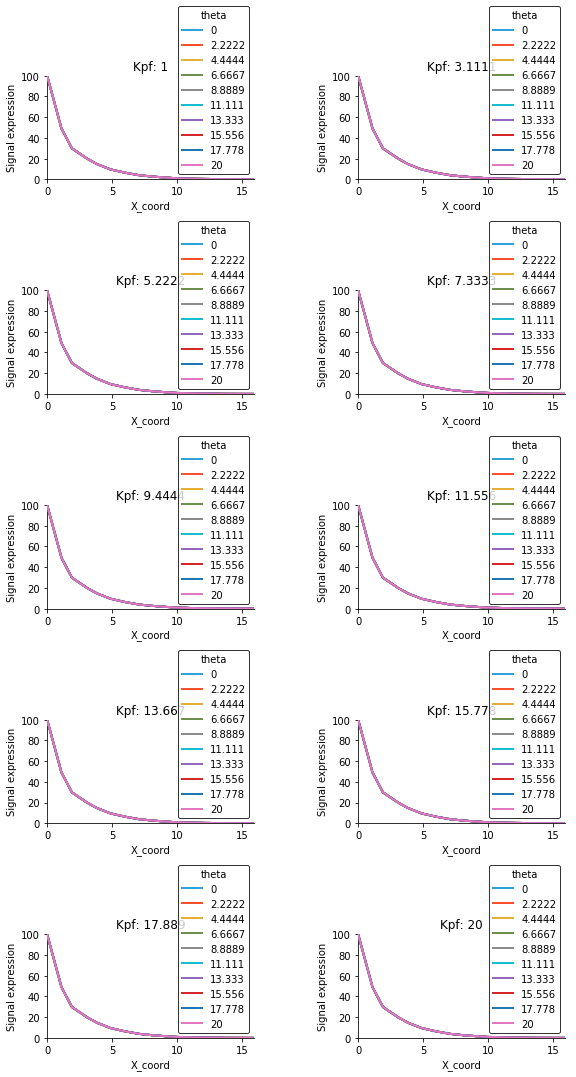

In [348]:
hv.Curve(
    data=x_axis_last_time_df,
    kdims=['X_coord'],
    vdims=['Signal expression', 'theta', 'Kpf'],
).groupby(
    ['theta', 'Kpf'],
).opts(
    aspect=2,
).overlay(
    'theta'
).layout(
    'Kpf'
).cols(2)

:NdLayout   [time]
   :Curve   [X_coord]   (Signal expression,time)
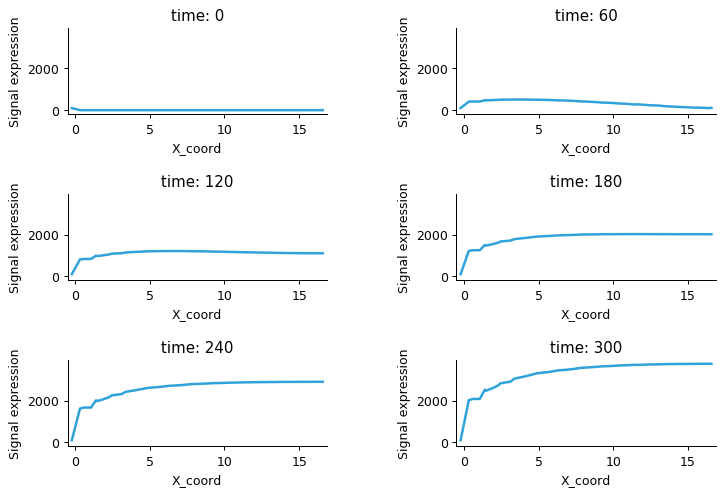

In [221]:
plt = hv.Curve(
    data=x_axis_df.loc[np.isin(x_axis_df['step'], np.arange(0, steps, steps // 5)), :],
    kdims=['X_coord'],
    vdims=['Signal expression', 'time'],
).groupby(
    'time',
).opts(
    padding=0.05,
#     s=40,
#     alpha=0.2,
    aspect=3,
).layout(
).opts(
    vspace=0.3,
).cols(2)

hv.output(plt, dpi=90)

In [211]:
# Plot cell lattice colored by expression 
colors = cc.palette.fire[:250:5]
levels = [int(x) for x in np.linspace(0, 105, 51)]

def plot_lattice(step,):
    plt = hv.Points(
        data=df.loc[df["step"] == step, :],
        kdims=["X_coord", "Y_coord"],
        vdims=["Signal expression"],
    ).options(
        padding=0.1,
#         height=300,
        aspect='equal',
#         width=350,
        s=25, 
#         color_index='a',
        color="Signal expression",
        color_levels=levels,
        cmap=colors,
        colorbar=True,
        title="time = {0:.2f}".format(dt * step),
        xaxis="bare", 
        yaxis="bare",
    )
    return plt

In [ ]:
hmap = hv.HoloMap([(step, plot_lattice(step)) for step in range(0, steps, 1)])

In [ ]:
vid = hv.output(hmap, holomap='mp4', fps=20)

Now let's track average time to activation as a function of distance from the sender. We'll say any cell with >50% of sender expression has been activated. 

In [145]:
# Get distances from sender
meta_df['Dist from sender'] = [np.linalg.norm(x - X[sender]) for x in X]
meta_df.head()

,cell,# neighbors,X_coord,Y_coord,Dist from sender
0,0,2,-16.0,-13.856406,21.166010
1,1,5,-15.5,-12.990381,20.223748
2,2,3,-16.0,-12.124356,20.074860
3,3,5,-15.5,-11.258330,19.157244
4,4,3,-16.0,-10.392305,19.078784


In [146]:
# Get time to 50%-sender expression (ES_50)
ES_50_dict = {}
for cell, expr in x_axis_df.groupby("cell"):
    if np.all(expr['Signal expression'].values < (S_sender / 2)):
        ES_50_dict[cell] = np.NaN
    else:
        ES_50_dict[cell] = expr["time"].values[
            np.searchsorted(
                expr["Signal expression"].values, 
                S_sender / 2, 
                side="right"
            )
        ]

# Add to x axis data
x_axis_df['ES_50'] = x_axis_df['cell'].replace(ES_50_dict)